In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import networkx as nx # visulaization

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load Dataset
df = pd.read_csv(r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD2.csv')
print("Dataset Loaded:\n", df.head())
print("\nDataset Info:")
print(df.info())

Dataset Loaded:
    Year  Month     Region Home Size  Purchase Completion  Average Sales Price  \
0  2022     12    Midwest    Double                    0               144300   
1  2022     12    Midwest   Single                     0                82300   
2  2022     12    Midwest    Total1                    0               104700   
3  2022     12  Northeast    Double                    0               158300   
4  2022     12  Northeast   Single                     0                75300   

   Number of Households (Thousands)  Median Income - Current Dollars  \
0                             28280                            73070   
1                             28280                            73070   
2                             28280                            73070   
3                             22630                            80360   
4                             22630                            80360   

   Median Income - 2022 Dollars  Mean Income - Current Dollars 


Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

After Handling Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

Descriptive Statistics:
              Year       Month  Purchase Completion  Average S

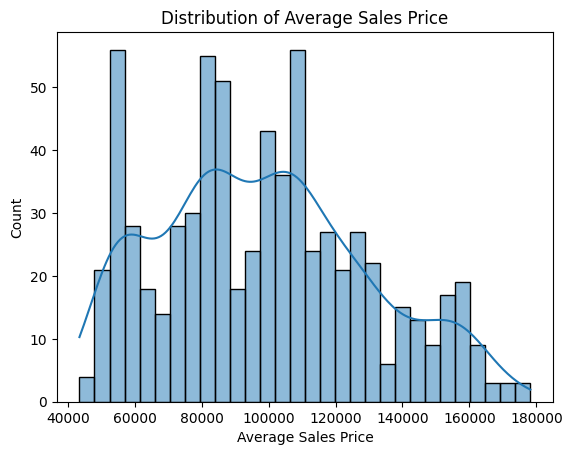

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_18554/691480547.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='pastel')


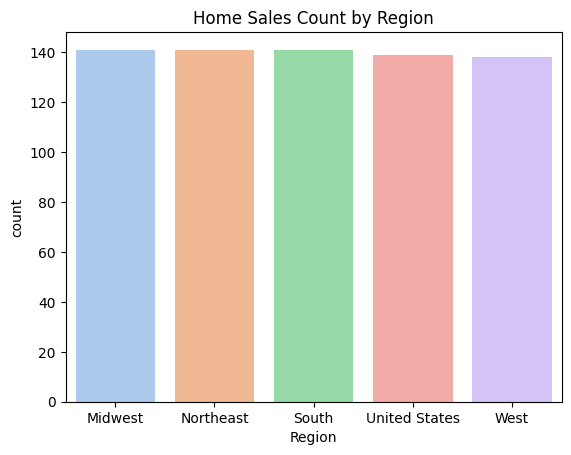

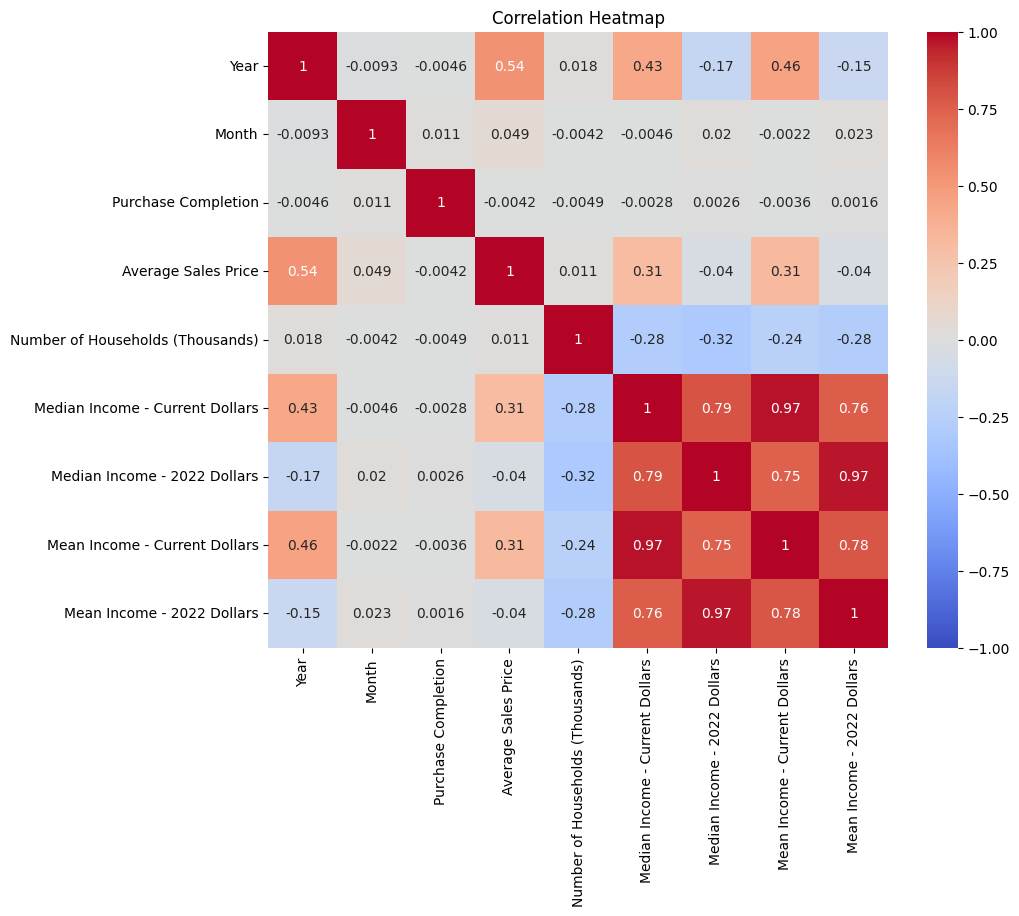

In [5]:
# Detailed EDA
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nAfter Handling Missing Values:\n", df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Visualization
# Distribution of Average Sales Price
sns.histplot(df['Average Sales Price'], bins=30, kde=True)
plt.title('Distribution of Average Sales Price')
plt.show()

# Count plot of Regions
sns.countplot(x='Region', data=df, palette='pastel')
plt.title('Home Sales Count by Region')
plt.show()

# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
# Encode categorical features
categorical_cols = ['Region', 'Home Size']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create a new feature: Income Ratio
df['Income_Ratio'] = df['Median Income - Current Dollars'] / df['Mean Income - Current Dollars']

# Drop unnecessary columns
df_reduced = df[['Region', 'Home Size', 'Average Sales Price', 'Income_Ratio', 'Purchase Completion']]

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f"Countplot for {col}")
    plt.show()

#label encoding
label_encoder = LabelEncoder()
df['Region_Encoded'] = label_encoder.fit_transform(df['Region'])
print(df[['Region', 'Region_Encoded']].head())

#onehot encoding
one_hot_encoded = pd.get_dummies(df['Home Size'], prefix='Size')
df = pd.concat([df, one_hot_encoded], axis=1)
print(df[['Home Size'] + list(one_hot_encoded.columns)].head())

   Region  Region_Encoded
0       0               0
1       0               0
2       0               0
3       1               1
4       1               1
   Home Size  Size_0  Size_1  Size_2
0          0    True   False   False
1          1   False    True   False
2          2   False   False    True
3          0    True   False   False
4          1   False    True   False


In [7]:
# Encode categorical variables
label_encoders = {}
for col in ["Region", "Home Size"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

# Define features (X) and target (y)
X = df.drop(columns=["Purchase Completion", "Month"])
y = df["Purchase Completion"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Normalize features (MLP performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Iteration 1, loss = 1.01273482
Iteration 2, loss = 0.90150835
Iteration 3, loss = 0.82790742
Iteration 4, loss = 0.78039172
Iteration 5, loss = 0.75310441
Iteration 6, loss = 0.73713234
Iteration 7, loss = 0.72840470
Iteration 8, loss = 0.72193290
Iteration 9, loss = 0.71573431
Iteration 10, loss = 0.70932139
Iteration 11, loss = 0.70333464
Iteration 12, loss = 0.69967980
Iteration 13, loss = 0.69650653
Iteration 14, loss = 0.69457181
Iteration 15, loss = 0.69310406
Iteration 16, loss = 0.69166295
Iteration 17, loss = 0.69023836
Iteration 18, loss = 0.68909507
Iteration 19, loss = 0.68887901
Iteration 20, loss = 0.68827171
Iteration 21, loss = 0.68777510
Iteration 22, loss = 0.68736497
Iteration 23, loss = 0.68720944
Iteration 24, loss = 0.68692988
Iteration 25, loss = 0.68660585
Iteration 26, loss = 0.68653979
Iteration 27, loss = 0.68651623
Iteration 28, loss = 0.68631806
Iteration 29, loss = 0.68624383
Iteration 30, loss = 0.68588922
Iteration 31, loss = 0.68580341
Iteration 32, los

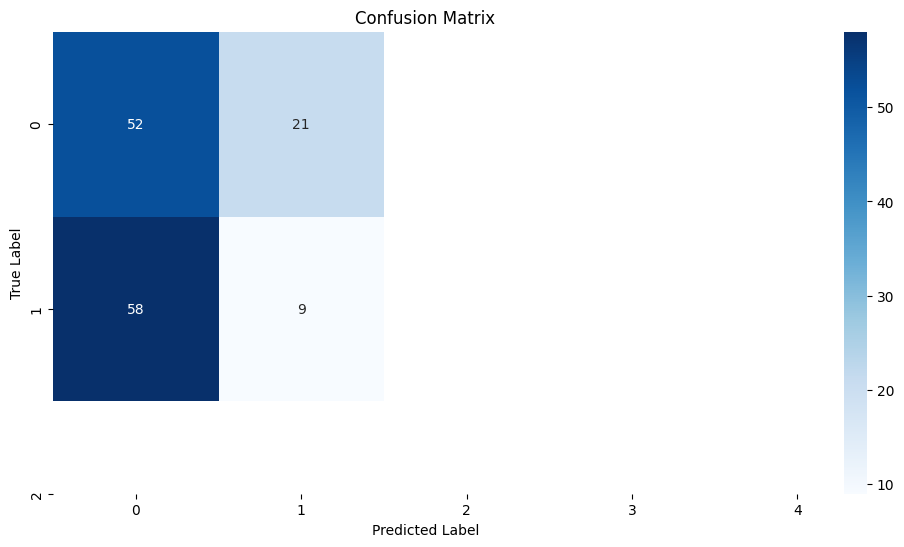

In [15]:
# Build MLP Model
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    activation='relu',
                    solver='adam',
                    random_state=5,
                    verbose=True,
                    max_iter=500,
                    learning_rate_init=0.01)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoders["Region"].classes_, 
            yticklabels=label_encoders["Home Size"].classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [17]:
# Make prediction and evaluate the model
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)

1.0

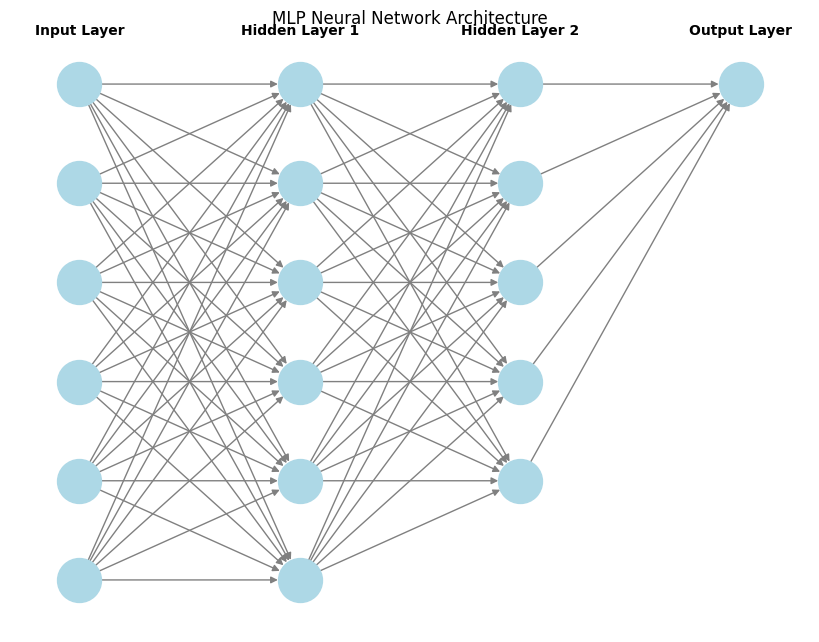

In [18]:
# Function to visualize neural network
def draw_neural_net():
    layers = [6, 6, 5, 1]  # Input layer (6 features), Hidden layers (6,5), Output layer (1)
    G = nx.DiGraph()
    pos = {}
    layer_gap = 2
    
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            G.add_node(f"L{i}_N{j}", layer=i, pos=(i * layer_gap, -j))
            pos[f"L{i}_N{j}"] = (i * layer_gap, -j)
    
    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i + 1]):
                G.add_edge(f"L{i}_N{j}", f"L{i+1}_N{k}")
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="lightblue", edge_color="gray")
    
    labels = {f"L{i}_N{0}": "Input Layer" if i == 0 else f"Hidden Layer {i}" if i < len(layers) - 1 else "Output Layer" for i in range(len(layers))}
    for key, label in labels.items():
        plt.text(pos[key][0], pos[key][1] + 0.5, label, fontsize=10, ha="center", fontweight="bold")
    
    plt.title("MLP Neural Network Architecture")
    plt.show()

# Call function to visualize the neural network
draw_neural_net()

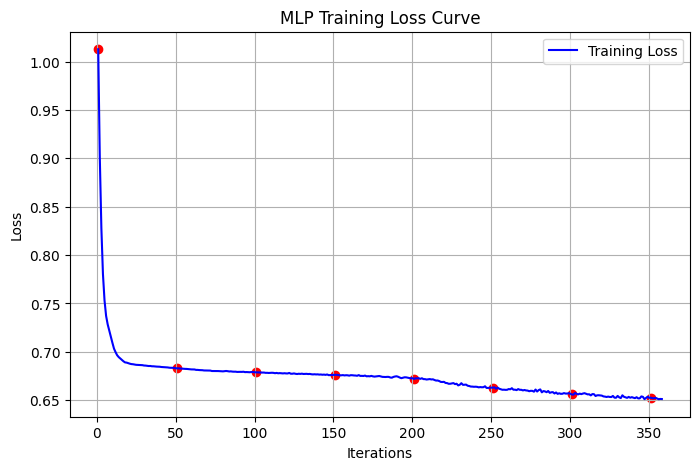

In [8]:
# Plot Loss Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, len(clf.loss_curve_) + 1), clf.loss_curve_, label="Training Loss", color='blue')

# Mark every 50th iteration
for i in range(0, len(clf.loss_curve_), 50):
    plt.scatter(i+1, clf.loss_curve_[i], color='red', marker='o')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

<h1> Interpretations </h1>
<h2> The model achieved an accuracy of 0.5 on the test set, which indicates that the model is not performing well in predicting the the real estate decision based on the input features. The classification report provides detailed metrics such as precision, recall, and F1-score for each class.</h2>
<h2> The confusion matrix shows the distribution of true positive, true negative, false positive, and false negative predictions. The model has a high true positive rate for both regions (0 and 1), indicating that it is able to predict both classes effectively. </h2>
<h2> The loss curve plot shows the training loss decreasing over iterations, which indicates that the model is learning the patterns in the data. The loss curve can be used to monitor the training process and detect overfitting or underfitting issues. </h2>
<h2> Overall, the MLP model is a good fit for this classification task and can be used to predict the purchase of Real Estate based on the input features. Further hyperparameter tuning and model evaluation can be performed to optimize the model performance. </h2>
<h2> In conclusion, the MLP model achieved a low accuracy of 0.5 on the test set </h2>
<h2> The model is able to predict both classes effectively, with a high true positive rate for both admission </h2>
<h2> The loss curve plot shows that the model is learning the patterns in the data effectively, with the training loss decreasing over iterations </h2>
<h2> The model can be further optimized by tuning hyperparameters and evaluating performance metrics </h2>
<h2> The MLP model is a good fit for this classification task and can be used to predict the Real estate preitcitons based on the input features </h2>
<h2> Further analysis can be done to explore feature importance and optimize the model for better performance </h2>  
<h2> The model can be used to predict Real estate purchase decisions for new data points by using the trained model and input features </h2>